In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")#忽略一些警告 不影响运行 
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
data=pd.read_csv("600519.csv",encoding='gbk')
data.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
0,2021/3/15,'600519,贵州茅台,1975.45,2069.80,1951.15,2050.0,2026.00,-50.55,-2.4951,0.4974,6248487,12459955712,2.480000e+12,2.480000e+12
1,2021/3/12,'600519,贵州茅台,2026.00,2077.00,2002.01,2070.0,2048.00,-22,-1.0742,0.3210,4032251,8181594631,2.550000e+12,2.550000e+12
2,2021/3/11,'600519,贵州茅台,2048.00,2079.99,1961.48,1975.0,1970.01,77.99,3.9589,0.4519,5676897,11521736384,2.570000e+12,2.570000e+12
3,2021/3/10,'600519,贵州茅台,1970.01,1999.87,1967.00,1977.0,1936.99,33.02,1.7047,0.4074,5117174,10136910284,2.470000e+12,2.470000e+12
4,2021/3/9,'600519,贵州茅台,1936.99,2000.00,1900.18,1955.0,1960.00,-23.01,-1.174,0.6549,8226581,16100769579,2.430000e+12,2.430000e+12


In [30]:
data.describe() 

,收盘价,最高价,最低价,开盘价,前收盘,换手率,成交量,成交金额,总市值,流通市值
count,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4742.000000,4.742000e+03,4.742000e+03,4.742000e+03,4.742000e+03
mean,308.414249,312.321752,304.097199,307.890346,309.195955,0.495056,2.806781e+06,1.140892e+09,3.621552e+11,3.498128e+11
std,412.304789,417.503877,406.530589,411.669803,410.832803,1.018357,2.425126e+06,1.909494e+09,5.288235e+11,5.352500e+11
min,0.000000,0.000000,0.000000,0.000000,20.880000,0.000000,0.000000e+00,0.000000e+00,6.316200e+09,1.806433e+09
25%,50.152500,51.037500,49.347500,50.042500,54.887500,0.217200,1.147454e+06,8.103864e+07,4.313638e+10,1.364134e+10
50%,170.740000,173.075000,168.425000,170.070000,170.940000,0.321650,2.433276e+06,4.496940e+08,1.710000e+11,1.625000e+11
75%,260.045000,265.745000,253.957500,259.510000,259.997500,0.524775,3.782081e+06,1.152284e+09,3.157500e+11,3.157500e+11
max,2601.000000,2627.880000,2485.000000,2587.980000,2601.000000,56.827700,4.063180e+07,1.849878e+10,3.270000e+12,3.270000e+12


In [15]:
data.drop(['股票代码','名称','日期',],axis=1, inplace=True) # 删除操作  # '涨跌额','涨跌幅','成交金额','总市值','流通市值','成交量','换手率'
data.columns

Index(['收盘价', '最高价', '最低价', '开盘价', '前收盘', '涨跌额', '涨跌幅', '换手率', '成交量', '成交金额',
       '总市值', '流通市值'],
      dtype='object')

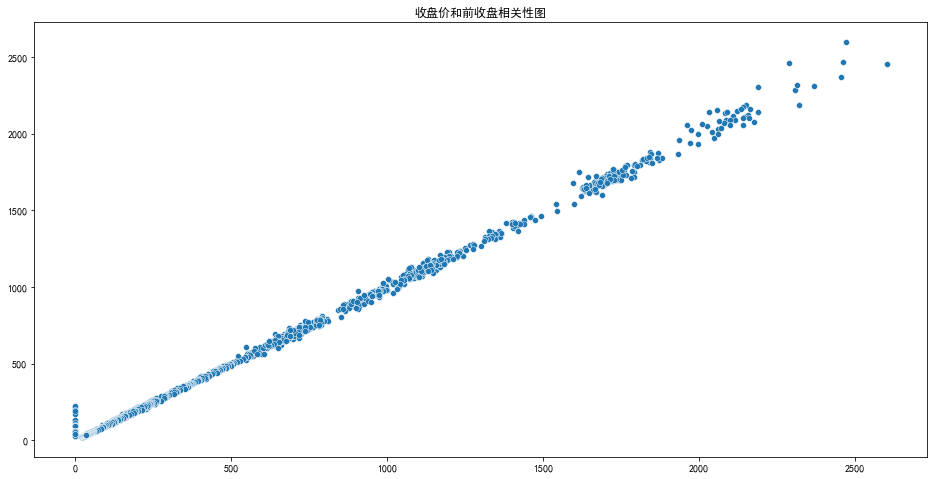

In [50]:
# 两类相关性分析
plt.figure(figsize=(16,8))
plt.title("收盘价和前收盘相关性图")
sns.scatterplot(list(data["收盘价"]),list(data["前收盘"]))
# 散点图
plt.show()

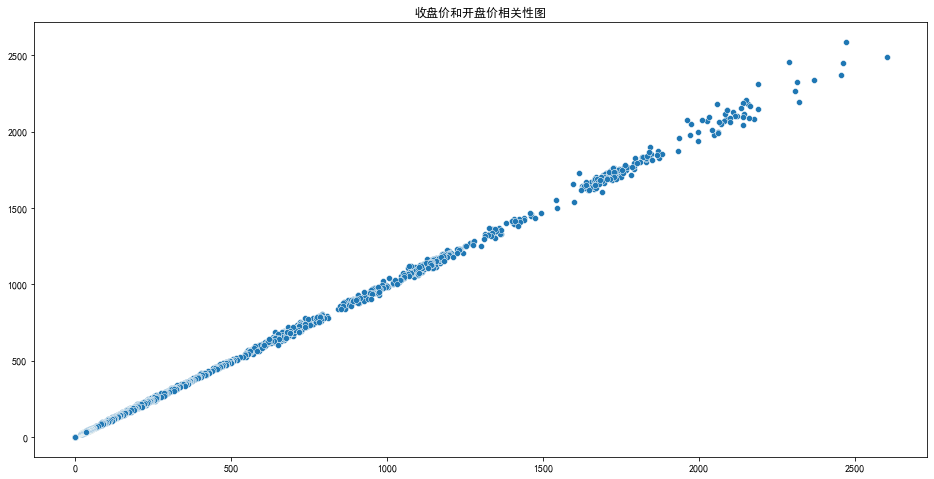

In [47]:
# 两类相关性分析  最高价', '最低价', '开盘价'
plt.figure(figsize=(16,8))
plt.title("收盘价和开盘价相关性图")
sns.scatterplot(list(data["收盘价"]),list(data["开盘价"]))
# 散点图
plt.show()

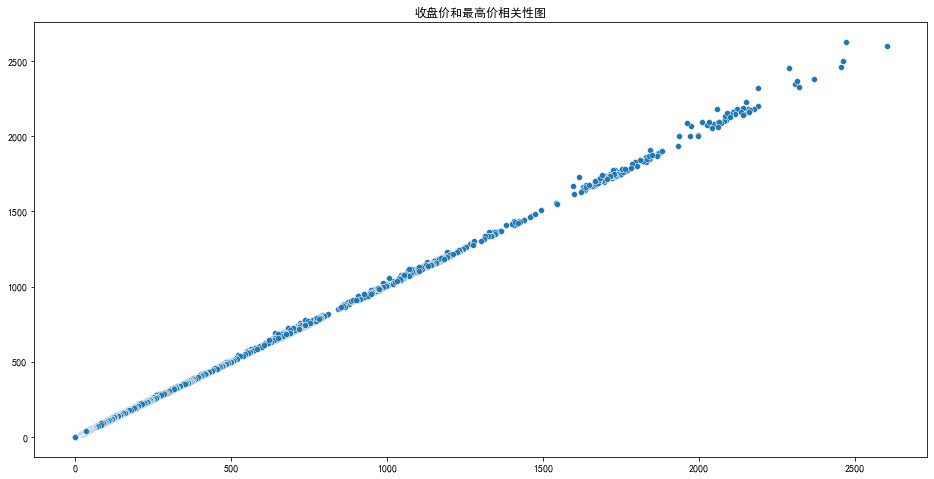

In [49]:
plt.figure(figsize=(16,8))
plt.title("收盘价和最高价相关性图")
sns.scatterplot(list(data["收盘价"]),list(data["最高价"]))
# 散点图
plt.show()

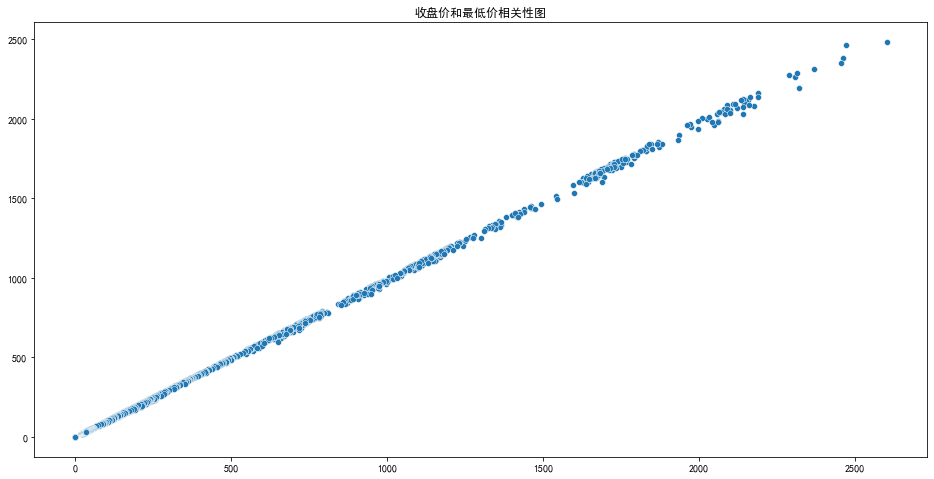

In [48]:
plt.figure(figsize=(16,8))
plt.title("收盘价和最低价相关性图")
sns.scatterplot(list(data["收盘价"]),list(data["最低价"]))
# 散点图
plt.show()

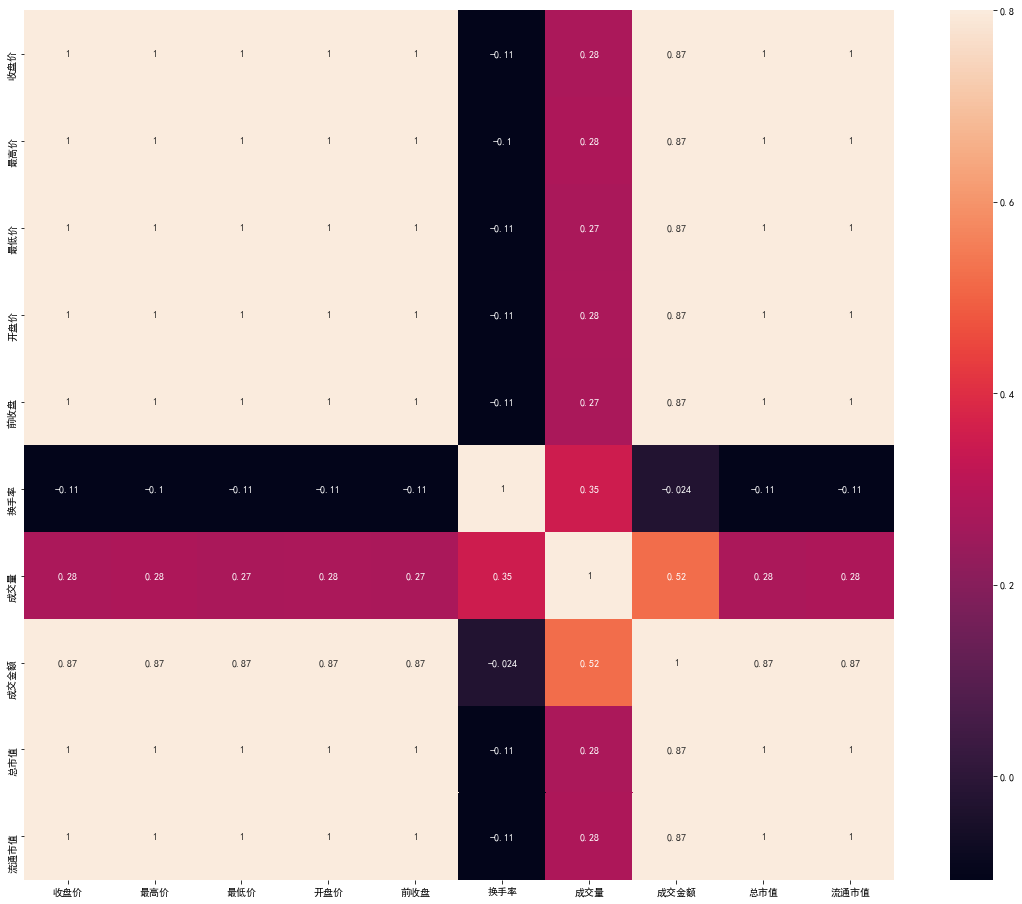

In [10]:
# 热力图 
ax=plt.subplots(figsize=(20,16))
ax=sns.heatmap(data.corr(),vmax=.8,square=True,annot=True)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [43]:
# ['收盘价', '最高价', '最低价', '开盘价', '前收盘', '涨跌额', '涨跌幅', '换手率', '成交量', '成交金额','总市值', '流通市值']
x = sm.add_constant(np.asarray(data.iloc[:,1:5].values))#生成自变量
y = data['收盘价'] #生成因变量
model = sm.OLS(y, x) #生成模型
result = model.fit() #模型拟合
result.summary() #模型描述

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    收盘价   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.688e+07
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:12:22   Log-Likelihood:                -12605.
No. Observations:                4742   AIC:                         2.522e+04
Df Residuals:                    4737   BIC:                         2.525e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.063     -0.083      0.934      -0.129       0.119
x1             0.8011      0.008     99.113      0.000       0.785       0.817
x2             0.8186      0.008    100.680      0.000       0.803       0.834
x3            -0.6097      0.010    -64.042      0.000      -0.628      -0.591
x4            -0.0097      0.004     -2.333      0.020      -0.018      -0.002
==============================================================================
Omnibus:                     1426.081   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139945.343
Skew:                          -0.407   Prob(JB):                         0.00
Kurtosis:                      29.601   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
n=int(input("请输入一个整数n"))
n_list=[]
for a in range(1,2*n+2,1): # 存储所有的 数据 
    n_list.append(a)
for i in range(n):# 循环输出 
    print(str(1)+" "+str(n_list[i+1])+" "+str(n_list[len(n_list)-i-1]))

请输入一个整数n 200


1 2 401
1 3 400
1 4 399
1 5 398
1 6 397
1 7 396
1 8 395
1 9 394
1 10 393
1 11 392
1 12 391
1 13 390
1 14 389
1 15 388
1 16 387
1 17 386
1 18 385
1 19 384
1 20 383
1 21 382
1 22 381
1 23 380
1 24 379
1 25 378
1 26 377
1 27 376
1 28 375
1 29 374
1 30 373
1 31 372
1 32 371
1 33 370
1 34 369
1 35 368
1 36 367
1 37 366
1 38 365
1 39 364
1 40 363
1 41 362
1 42 361
1 43 360
1 44 359
1 45 358
1 46 357
1 47 356
1 48 355
1 49 354
1 50 353
1 51 352
1 52 351
1 53 350
1 54 349
1 55 348
1 56 347
1 57 346
1 58 345
1 59 344
1 60 343
1 61 342
1 62 341
1 63 340
1 64 339
1 65 338
1 66 337
1 67 336
1 68 335
1 69 334
1 70 333
1 71 332
1 72 331
1 73 330
1 74 329
1 75 328
1 76 327
1 77 326
1 78 325
1 79 324
1 80 323
1 81 322
1 82 321
1 83 320
1 84 319
1 85 318
1 86 317
1 87 316
1 88 315
1 89 314
1 90 313
1 91 312
1 92 311
1 93 310
1 94 309
1 95 308
1 96 307
1 97 306
1 98 305
1 99 304
1 100 303
1 101 302
1 102 301
1 103 300
1 104 299
1 105 298
1 106 297
1 107 296
1 108 295
1 109 294
1 110 293
1 111 292
1 112 